<a href="https://colab.research.google.com/github/NishaMDev/DeepLearning/blob/main/DeepLearning/DL_Assignment_1_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment # 1**

**Part 1: Blackbox deep learning:-**

Write colab for SOTA using the following:-

1.   cnn_learner for image classification
2.   unet_learner for segmentation
3.   text_classifier_learner for sentiment analysis
4.   tabular_learner for decisiontree
5.   collab_learner for ranking


In [2]:
pip install fastai --upgrade

     |████████████████████████████████| 189 kB 27.8 MB/s 
     |████████████████████████████████| 56 kB 6.0 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


**1. Performing Image Classification using cnn_learner.**

In [1]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.182561,0.022547,0.007442,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.056274,0.033104,0.008119,00:51


**2. Performing segmentation using unet_learner.**

In [2]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,3.059175,2.339595,00:04


epoch,train_loss,valid_loss,time
0,1.720414,1.422531,00:01
1,1.526932,1.184443,00:01
2,1.458034,1.184984,00:01
3,1.345565,0.961204,00:01
4,1.210851,0.787859,00:01
5,1.093590,0.759778,00:01
6,0.999925,0.741627,00:01
7,0.927136,0.737030,00:01


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


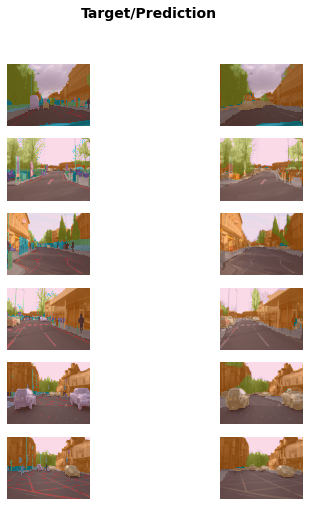

In [3]:
learn.show_results(max_n=6, figsize=(7,8))

**3.   Performing Sentiment Analysis using text_classifier_learner.**

In [4]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.462613,0.395267,0.823000,03:24


epoch,train_loss,valid_loss,accuracy,time
0,0.302526,0.242875,0.902480,06:55
1,0.239422,0.204145,0.922000,06:58
2,0.177721,0.192670,0.927280,06:58
3,0.156179,0.199558,0.927040,06:58


**4.   Performing Decision Tree using tabular_learner.**



In [5]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [6]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.380046,0.377053,0.823096,00:04
1,0.364234,0.359775,0.832156,00:04
2,0.350711,0.355249,0.833538,00:04


**5.   Performing Ranking using collab_learner.**

In [7]:
from fastai.collab import *


path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.523443,1.434180,00:00


epoch,train_loss,valid_loss,time
0,1.370133,1.375648,00:00
1,1.278514,1.196302,00:00
2,1.061407,0.871360,00:00
3,0.825966,0.703731,00:00
4,0.699395,0.658476,00:00
5,0.638775,0.643385,00:00
6,0.630391,0.635769,00:00
7,0.619129,0.632981,00:00
8,0.609446,0.631538,00:00
9,0.603617,0.631478,00:00


In [8]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,72.0,8.0,2.5,3.231499
1,77.0,7.0,2.0,4.401787
2,65.0,37.0,3.0,3.676283
3,35.0,18.0,3.0,3.096436
4,74.0,56.0,4.0,4.419332
5,59.0,7.0,5.0,4.622799
6,30.0,39.0,4.0,4.205999
7,49.0,76.0,3.0,4.141369
8,42.0,77.0,4.0,3.587902
